<a href="https://colab.research.google.com/github/bimal-bp/Moviereviewsystem.ipynb/blob/ML_MODELS/Moviereviewsystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SENTIMENT ANAYLYSIS**

In this Machine Learning Project, we’ll build binary classification that puts movie reviews texts into one of two categories — negative or positive sentiment. We’re going to have a brief look at the Bayes theorem and relax its requirements using the Naive assumption.

In [13]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/IMDB-Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [15]:
df.duplicated().sum()

418

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [17]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [18]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [19]:
df['review'][118]

"I have now seen quite a few films by Pedro Almodóvar, but this would have to be the most disappointing so far. This film seemed to lack the zaniness that is usually everywhere in his films, and the story just never got me interested. Many Almodóvar regulars appear in this film, so it's not like there was a lack of on-screen talent, but this film just seemed more serious than his other films. If there was a comedic edge to this movie, I certainly couldn't find it, and it made for one surprisingly weak movie."

In [20]:
df['review'][1008]

'"I like cheap perfume better; it doesn\'t last as long..." - Ralph Meeker\'s convict character (Lawson) tells this to Barbara Stanwyck\'s Helen character, after he gets a whiff of the perfume that she picked out w/her husband in Tijuana...! This line cracked me up, and also seemed like a metaphor for this film - that cheap is better than expensive, because a cheap perfume-loving man who has a way with a 2 x 4 is a better man to have around in the long run! I agree with some of the other comments posted about Helen\'s attraction to Lawson. Even though her narration states that she wants Lawson to be put away, she did seem attracted to his fiery nature, and that passion he stirred up in her wouldn\'t likely wash away with the tide!'

In [21]:
# libraries

import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

In [22]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [24]:
df.sentiment.replace('positive',1,inplace=True)
df.sentiment.replace('negative',0,inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [26]:
# remove html tag
# special characetr
# lower case
# remove stopwords
#stemming

In [28]:
# remove html tag

def clean(text):
  cleaned=re.compile('<.*?>')
  return re.sub(cleaned,'',text)

df.review=df.review.apply(clean)

In [29]:
# remove of specail character

def is_special(text):
    rem = ''  # Initialize an empty string to store the cleaned text
    for i in text:
        if i.isalnum():
            rem = rem + i  # If the character is alphanumeric, add it to the result
        else:
            rem = rem + ' '  # If the character is not alphanumeric, add a space to the result
    return rem  # Return the cleaned text
df.review=df.review.apply(is_special)


In [30]:
# lower case
def to_lower(text):
  return text.lower()
df.review=df.review.apply(to_lower)

In [37]:
# remove stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')


nltk.download('stopwords')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Renamed the variable to stop_words
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

# Assuming df is a DataFrame with a 'review' column
df['review'] = df['review'].apply(rem_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# now stemmming

def stem_text(text):
  ss=SnowballStemmer('english')
  return " ".join([ss.stem(w) for w in text])
df.review=df.review.apply(stem_text)

In [39]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


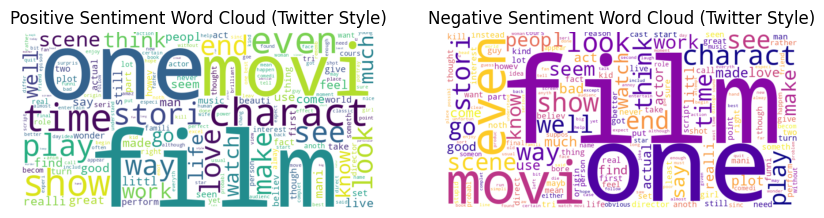

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd



df = pd.DataFrame(df)

# Separate positive and negative reviews
positive_text = ' '.join(df[df['sentiment'] == 1]['review'])
negative_text = ' '.join(df[df['sentiment'] == 0]['review'])

# Create WordCloud for positive sentiment with Twitter style
positive_wordcloud = WordCloud(width=800, height=400, background_color='white',
                               colormap='viridis').generate(positive_text)

# Create WordCloud for negative sentiment with Twitter style
negative_wordcloud = WordCloud(width=800, height=400, background_color='white',
                               colormap='plasma').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud (Twitter Style)')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud (Twitter Style)')
plt.axis("off")

plt.show()


# **MODEL CREATION**

In [52]:
# creating bag of words

x=np.array(df.iloc[:,0].values)
y=np.array(df.sentiment.values)
cv=CountVectorizer(max_features=1000)
x=cv.fit_transform(df.review).toarray()
print("x.shape=",x.shape)
print("y.shape=",y.shape)

x.shape= (50000, 1000)
y.shape= (50000,)


In [54]:
x[0].shape

(1000,)

In [59]:
# train test split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : X = (40000, 1000), y = (40000,)
Test shapes : X = (10000, 1000), y = (10000,)


In [62]:
# MODEL DEFINING

gnb,mnb,bnb=GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)

gnb.fit(trainx,trainy)
mnb.fit(trainx,trainy)
bnb.fit(trainx,trainy)

BernoulliNB()

In [63]:
# prediction
ypg=gnb.predict(testx)
ypm=mnb.predict(testx)
ypb=bnb.predict(testx)

In [64]:
print("Gaussian = ",accuracy_score(testy,ypg))
print("Multinomial = ",accuracy_score(testy,ypm))
print("Bernoulli = ",accuracy_score(testy,ypb))

Gaussian =  0.7843
Multinomial =  0.831
Bernoulli =  0.8386


In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(trainx,trainy)
ylr=lr.predict(testx)
print("LogisticRegression = ",accuracy_score(testy,ylr))

LogisticRegression =  0.8638


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(trainx, trainy)
y_dt = dt.predict(testx)
print("Decision Tree = ", accuracy_score(testy, y_dt))

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(trainx, trainy)
y_xgb = xgb.predict(testx)
print("XGBoost = ", accuracy_score(testy, y_xgb))


Decision Tree =  0.7173
XGBoost =  0.8522


In [71]:
import pickle

# Assuming 'ylr' is the model you want to save
with open('model1.pkl', 'wb') as file:
    pickle.dump(ylr, file)


In [72]:
rev =  """Terrible. Complete trash. Brainless tripe. Insulting to anyone who isn't an 8 year old fan boy. Im actually pretty disgusted that this movie is making the money it is - what does it say about the people who brainlessly hand over the hard earned cash to be 'entertained' in this fashion and then come here to leave a positive 8.8 review?? Oh yes, they are morons. Its the only sensible conclusion to draw. How anyone can rate this movie amongst the pantheon of great titles is beyond me.

So trying to find something constructive to say about this title is hard...I enjoyed Iron Man? Tony Stark is an inspirational character in his own movies but here he is a pale shadow of that...About the only 'hook' this movie had into me was wondering when and if Iron Man would knock Captain America out...Oh how I wished he had :( What were these other characters anyways? Useless, bickering idiots who really couldn't organise happy times in a brewery. The film was a chaotic mish mash of action elements and failed 'set pieces'...

I found the villain to be quite amusing.

And now I give up. This movie is not robbing any more of my time but I felt I ought to contribute to restoring the obvious fake rating and reviews this movie has been getting on IMDb."""


f1=clean(rev)
f2=is_special(f1)
f3=to_lower(f2)
f4=rem_stopwords(f3)
f5=stem_text(f4)

bow,words=[],word_tokenize(f5)
for word in words:
  bow.append(words.count(word))

word_dict=cv.vocabulary_

pickle.dump(word_dict,open('bow.pkl','wb'))
